# Stephen Wickwire

# Import Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## 1

In [2]:
df = pd.read_csv ('titanic.csv')
df5 = df.head(5)
df5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df5.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2

In [7]:
newdf5 = df5.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])
newdf5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
newerdf5 = newdf5[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
newerdf5

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


## 3 & 4

In [13]:
newerdf5.loc[(newerdf5.Sex == 'male'), 'Sex']=1
newerdf5.loc[(newerdf5.Sex == 'female'), 'Sex']=0
newerdf5

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


## 5

In [26]:
newerdf5 = newerdf5.astype({'Sex':int})

In [27]:
newerdf5.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

## 6

Text(0, 0.5, 'Outcomes')

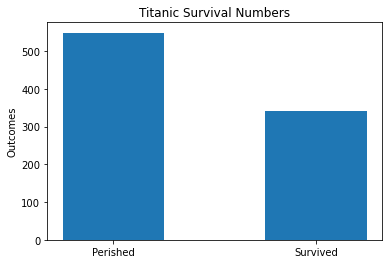

In [35]:
counts = df['Survived'].value_counts()
w = .5

plt.bar(x=['Perished','Survived'],height = counts, width=w)
plt.title("Titanic Survival Numbers")
plt.ylabel("Outcomes")

## 7

In [44]:
df['Pclass'].mean()

2.308641975308642

In [48]:
df.loc[(df.Sex == 'male'), 'Sex']=1
df.loc[(df.Sex == 'female'), 'Sex']=0
df = df.astype({'Sex':int})
df['Sex'].mean()

0.6475869809203143

In [49]:
df['Age'].mean()

29.69911764705882

In [50]:
df['SibSp'].mean()

0.5230078563411896

In [51]:
df['Parch'].mean()

0.38159371492704824

In [52]:
df['Fare'].mean()

32.204207968574636

In [43]:
df['Survived'].mean()

0.3838383838383838

## 8

In [53]:
grouped_df = df.groupby('Survived')

In [54]:
grouped_df['Pclass'].mean()

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

In [55]:
grouped_df['Sex'].mean()

Survived
0    0.852459
1    0.318713
Name: Sex, dtype: float64

In [56]:
grouped_df['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [57]:
grouped_df['SibSp'].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

In [58]:
grouped_df['Parch'].mean()

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

In [59]:
grouped_df['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

## 9

In [80]:
average = df.mean(axis =0)
mean = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']] 

In [81]:
group = mean.groupby(mean['Survived']).mean()
groupT = group.T
groupT['All Passenger Averages'] = mean.mean()
groupT

Survived,0,1,All Passenger Averages
Pclass,2.531876,1.950292,2.308642
Sex,0.852459,0.318713,0.647587
Age,30.626179,28.343690,29.699118
SibSp,0.553734,0.473684,0.523008
Parch,0.329690,0.464912,0.381594
Fare,22.117887,48.395408,32.204208


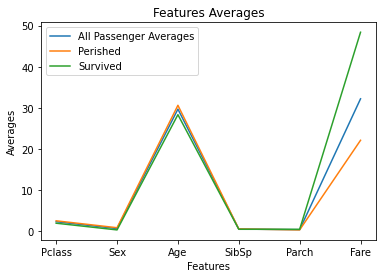

In [82]:
plt.plot(groupT['All Passenger Averages'], label ='All Passenger Averages')
plt.plot(groupT[0], label='Perished')
plt.plot(groupT[1], label='Survived')
plt.title("Features Averages")
plt.xlabel("Features")
plt.ylabel("Averages")
plt.legend()
plt.show()

## 10

In [84]:
cols = groupT.columns.tolist()
cols = [cols[-1]] + cols[:-1]
groupT = groupT[cols]
bestdf = groupT.T
bestdf

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
All Passenger Averages,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


No handles with labels found to put in legend.


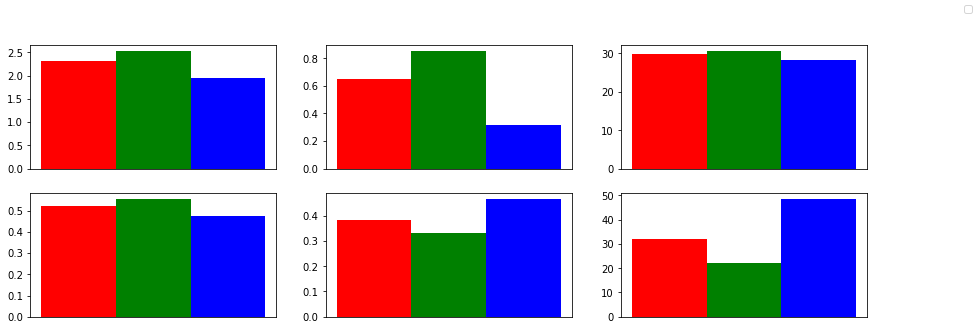

In [108]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize =(15,5))
ax[0,0].bar


pClass = bestdf['Pclass']
sex = bestdf['Sex']
age = bestdf['Age']
sib = bestdf['SibSp']
parch = bestdf['Parch']
fare = bestdf['Fare']

ax[0,0].bar(x=[0,.5,1], height=pClass,color=['red','green','blue'],width=.5)
ax[0,0].axes.xaxis.set_visible(False)

ax[0,1].bar(x=[0,.5,1], height=sex ,color=['red','green','blue'],width=.5)
ax[0,1].axes.xaxis.set_visible(False)

ax[0,2].bar(x=[0,.5,1], height=age ,color=['red','green','blue'],width=.5)
ax[0,2].axes.xaxis.set_visible(False)

ax[1,0].bar(x=[0,.5,1], height=sib ,color=['red','green','blue'],width=.5)
ax[1,0].axes.xaxis.set_visible(False)

ax[1,1].bar(x=[0,.5,1], height=parch ,color=['red','green','blue'],width=.5)
ax[1,1].axes.xaxis.set_visible(False)

ax[1,2].bar(x=[0,.5,1], height=fare ,color=['red','green','blue'],width=.5)
ax[1,2].axes.xaxis.set_visible(False)



## 11

In [109]:
pClass1 = df['Pclass']
sex1 = df['Sex']
age1 = df['Age']
sib1 = df['SibSp']
parch1 = df['Parch']
fare1 = df['Fare']
survived1 = df['Survived']


correlationPclass = pClass1.corr(survived1)
correlationPclass

-0.33848103596101475

In [110]:
correlationsex = sex1.corr(survived1)
correlationsex

-0.5433513806577555

In [111]:
correlationage = age1.corr(survived1)
correlationage

-0.07722109457217768

In [112]:
correlationsib = sib1.corr(survived1)
correlationsib

-0.035322498885735645

In [113]:
correlationparch = parch1.corr(survived1)
correlationparch

0.08162940708348372

In [114]:
correlationfare = fare1.corr(survived1)
correlationfare

0.2573065223849625

## 12

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

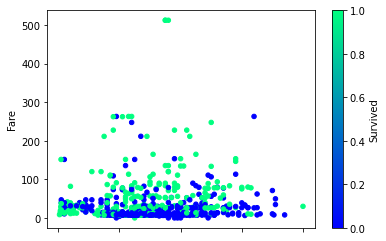

In [126]:
scat = df.plot.scatter(x='Age',y='Fare',c='Survived',colormap='winter')
scat.xlabel("Age")
scat.ylabel("Fare")
scat.legend()